In [1]:
import pandas as pd
import datetime
from google.colab import files 
import io
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Download Thai font
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf

In [3]:
# Set Thai font
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font', family='TH Sarabun Chula')

sns.set(font="TH Sarabun Chula")

In [4]:
# upload file to google colab
uploaded = files.upload()

Saving CustomerBehaviors.xlsx to CustomerBehaviors.xlsx


In [5]:
df = pd.read_excel("/content/CustomerBehaviors.xlsx")

In [6]:
df.columns = ['time','I_ญี่ปุ่น', 'I_จีน', 'I_ไทย', 'I_อีสาน', 'I_สุขภาพ', 'I_บุฟเฟ่ต์', 'I_ชาบู', 'I_ปิ้งย่าง', 'I_เหล้าเบีย', 'I_แฟชั่น',
'I_แต่งหน้า', 'I_บำรุงผิว', 'I_ออกกำลังกาย', 'I_เล่นเกมส์', 'I_ท่องเที่ยว', 'I_อ่านหนังสือ', 'I_บทความonline', 'I_elearning', 'I_series',
'I_ดูหนัง', 'I_youtube', 'I_netflix', 'I_บันเทิง', 'I_เกมส์', 'I_รีวิวร้านอาหาร', 'I_ท่องเที่ยว', 'I_แต่งบ้าน', 'I_โทรทัศน์', 'I_ละคร',
'I__การเมือง', 'F_ญี่ปุ่น', 'F_จีน', 'F_ไทย', 'F_อีสาน', 'F_สุขภาพ', 'F_บุฟเฟ่ต์', 'F_ชาบู', 'F_ปิ้งย่าง', 'F_เหล้าเบีย', 'F_แฟชั่น',
'F_แต่งหน้า', 'F_บำรุงผิว', 'F_ออกกำลังกาย', 'F_เล่นเกมส์', 'F_ท่องเที่ยว', 'F_อ่านหนังสือ', 'F_บทความonline', 'F_elearning', 'F_series',
'F_ดูหนัง', 'F_youtube', 'F_netflix', 'F_บันเทิง', 'F_เกมส์', 'F_รีวิวร้านอาหาร', 'F_ท่องเที่ยว', 'F_แต่งบ้าน', 'F_โทรทัศน์', 'F_ละคร',
'F__การเมือง','อื่นๆ', 'วันเกิด', 'เพศ']

In [7]:
df = df.replace(['ไม่สนใจอย่างมากที่สุด', 'ไม่สนใจอย่างมาก','ไม่สนใจ','เฉยๆ','สนใจ','สนใจอย่างมาก','สนใจอย่างมากที่สุด'],[1, 2, 3, 4, 5, 6, 7])
df = df.replace(['แทบไม่ได้บริโภคเลย', 'หลายเดือนครั้ง', 'เดือนละครั้ง', 'เดือนละ 2-3 ครั้ง', 'อาทิตย์ละครั้ง', 'แทบทุกวัน'], [1, 2, 3, 4, 5, 6])

In [8]:
other = df['อื่นๆ']

In [9]:
df = df.drop(['time', 'อื่นๆ'], axis=1)

In [11]:
current_year = datetime.date.today().year
for index, row in df.iterrows():
  year = row['วันเกิด'].year
  if (year > 2400):
    year = year-543
  else:
    year = year
  age = current_year - year
  df.at[index, 'วันเกิด'] = age

# Change column name
df.rename(columns={'วันเกิด':'อายุ'})

,I_ญี่ปุ่น,I_จีน,I_ไทย,I_อีสาน,I_สุขภาพ,I_บุฟเฟ่ต์,I_ชาบู,I_ปิ้งย่าง,I_เหล้าเบีย,I_แฟชั่น,I_แต่งหน้า,I_บำรุงผิว,I_ออกกำลังกาย,I_เล่นเกมส์,I_ท่องเที่ยว,I_อ่านหนังสือ,I_บทความonline,I_elearning,I_series,I_ดูหนัง,I_youtube,I_netflix,I_บันเทิง,I_เกมส์,I_รีวิวร้านอาหาร,I_ท่องเที่ยว,I_แต่งบ้าน,I_โทรทัศน์,I_ละคร,I__การเมือง,F_ญี่ปุ่น,F_จีน,F_ไทย,F_อีสาน,F_สุขภาพ,F_บุฟเฟ่ต์,F_ชาบู,F_ปิ้งย่าง,F_เหล้าเบีย,F_แฟชั่น,F_แต่งหน้า,F_บำรุงผิว,F_ออกกำลังกาย,F_เล่นเกมส์,F_ท่องเที่ยว,F_อ่านหนังสือ,F_บทความonline,F_elearning,F_series,F_ดูหนัง,F_youtube,F_netflix,F_บันเทิง,F_เกมส์,F_รีวิวร้านอาหาร,F_ท่องเที่ยว,F_แต่งบ้าน,F_โทรทัศน์,F_ละคร,F__การเมือง,อายุ,เพศ
0,5,5,7,6,5,5,5,5,7,4,3,5,6,6,4,5,5,7,6,6,5,7,5,6,6,4,4,4,4,7,4,2,6,5,6,4,4,3,5,2,2,6,6,5,4,4,4,4,4,5,5,5,2,3,4,4,4,4,4,6,33,ชาย
1,6,4,7,6,5,6,7,6,3,4,4,4,6,6,7,7,7,7,4,7,7,6,4,4,6,7,7,4,3,5,5,2,6,5,5,4,4,4,1,3,1,3,6,6,3,6,6,5,2,5,6,4,3,4,6,6,5,2,2,5,28,หญิง
2,7,4,6,5,4,7,7,7,2,4,1,2,5,7,7,7,7,4,7,7,7,7,7,7,7,7,7,6,3,7,5,2,6,2,2,3,3,3,1,1,1,1,2,5,2,6,4,4,6,6,6,6,6,6,6,4,4,4,2,6,28,ชาย
3,5,4,4,4,5,5,5,5,1,1,1,7,6,7,7,5,5,6,7,7,7,7,1,7,4,5,4,3,1,6,3,1,6,4,1,3,3,3,1,1,1,6,3,4,2,4,4,4,5,5,5,5,1,6,3,3,1,1,1,4,27,ชาย
4,6,5,5,5,7,4,4,4,4,4,5,6,7,3,5,6,5,5,7,7,4,7,4,3,4,5,5,3,3,4,4,3,5,5,6,2,2,2,3,3,6,6,6,1,2,4,5,4,5,5,4,5,3,1,3,4,3,1,1,4,26,หญิง
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,5,7,7,7,7,4,4,4,4,5,4,5,7,3,5,6,6,7,7,7,6,5,7,3,4,4,4,6,7,4,2,2,6,4,2,2,2,2,2,2,1,2,5,1,1,6,6,6,6,1,6,1,6,1,3,2,2,6,6,5,48,หญิง
59,6,5,6,5,7,6,7,6,4,5,2,5,7,7,7,5,6,6,7,7,7,7,7,5,5,7,2,4,5,6,2,2,6,4,4,4,4,3,2,2,1,2,4,6,3,4,6,4,6,6,6,4,5,4,2,3,1,1,2,5,32,ชาย
60,5,4,6,6,5,2,4,5,3,6,6,6,5,5,7,4,5,5,6,5,6,6,4,5,5,6,5,4,4,4,3,2,6,5,5,2,2,3,2,4,5,6,5,5,3,3,4,5,5,3,6,5,4,5,6,6,4,3,3,4,27,หญิง
61,7,5,6,6,6,7,7,7,4,5,6,7,4,7,7,5,5,6,7,7,6,7,6,6,7,7,7,5,5,4,4,2,4,5,3,3,3,3,2,2,2,5,1,5,3,3,3,2,5,5,4,5,3,3,3,4,4,1,2,2,31,หญิง


Data Exploration

In [12]:
desciption = df.describe()

Correlation estimation

In [13]:
df.corr()

,I_ญี่ปุ่น,I_จีน,I_ไทย,I_อีสาน,I_สุขภาพ,I_บุฟเฟ่ต์,I_ชาบู,I_ปิ้งย่าง,I_เหล้าเบีย,I_แฟชั่น,I_แต่งหน้า,I_บำรุงผิว,I_ออกกำลังกาย,I_เล่นเกมส์,I_ท่องเที่ยว,I_อ่านหนังสือ,I_บทความonline,I_elearning,I_series,I_ดูหนัง,I_youtube,I_netflix,I_บันเทิง,I_เกมส์,I_รีวิวร้านอาหาร,I_ท่องเที่ยว,I_แต่งบ้าน,I_โทรทัศน์,I_ละคร,I__การเมือง,F_ญี่ปุ่น,F_จีน,F_ไทย,F_อีสาน,F_สุขภาพ,F_บุฟเฟ่ต์,F_ชาบู,F_ปิ้งย่าง,F_เหล้าเบีย,F_แฟชั่น,F_แต่งหน้า,F_บำรุงผิว,F_ออกกำลังกาย,F_เล่นเกมส์,F_ท่องเที่ยว,F_อ่านหนังสือ,F_บทความonline,F_elearning,F_series,F_ดูหนัง,F_youtube,F_netflix,F_บันเทิง,F_เกมส์,F_รีวิวร้านอาหาร,F_ท่องเที่ยว,F_แต่งบ้าน,F_โทรทัศน์,F_ละคร,F__การเมือง
I_ญี่ปุ่น,1.000000,0.183296,0.145602,0.147661,-0.065076,0.419898,0.565748,0.291514,-0.122948,0.132005,0.001303,0.005521,-0.143173,0.069919,0.079148,0.016923,9.384739e-02,0.160462,0.181694,0.138813,0.259322,0.162962,0.189610,0.211447,0.492472,0.326259,0.047509,-0.020065,0.113752,-0.002893,0.413344,0.063784,-1.121110e-01,0.097322,-0.128394,0.277189,0.409087,0.020216,-0.303534,0.022436,-0.094554,-0.021323,-0.256157,0.088739,-0.010423,-0.217363,-0.140286,-0.054788,0.013245,0.142388,-0.075287,0.082088,0.251390,0.115937,0.220768,0.029270,-0.125398,-0.050899,-0.025885,-0.147825
I_จีน,0.183296,1.000000,-0.019348,-0.001542,0.184708,-0.046306,0.053874,0.164691,0.074457,-0.080016,0.042797,-0.052147,-0.089687,-0.235995,0.141182,-0.106191,-5.529288e-02,0.190193,0.141822,0.071990,0.119347,0.071265,0.142805,-0.164434,-0.008829,0.142515,0.055277,0.146242,0.256343,-0.061932,0.006941,0.585614,-1.490330e-01,0.057371,0.094554,-0.077662,0.172838,0.201332,0.094444,-0.138003,-0.140284,-0.129196,-0.015226,-0.265114,0.118469,0.001373,0.213368,0.003214,0.176666,0.219778,-0.213404,0.044639,0.108083,-0.245683,-0.082448,0.117202,-0.001239,0.096704,0.033484,-0.081524
I_ไทย,0.145602,-0.019348,1.000000,0.587620,0.139504,0.028239,0.122320,0.012510,0.223797,0.305590,0.275282,0.182062,0.123245,-0.034493,0.119156,-0.086073,-4.123630e-02,0.312424,0.116650,0.060891,0.296258,0.301399,0.358933,0.080494,0.258793,0.307045,0.228765,0.258939,0.368052,0.294486,0.165424,-0.277417,2.954137e-01,0.404954,0.177281,0.092617,0.112098,0.153350,0.053374,0.274059,0.092320,-0.009087,0.178479,0.032597,0.239621,-0.171907,-0.046654,0.150004,0.009967,-0.008609,0.223736,0.104222,0.221368,-0.112325,0.329955,0.304046,0.316684,0.310658,0.301103,0.337115
I_อีสาน,0.147661,-0.001542,0.587620,1.000000,0.272640,-0.021135,0.002153,-0.214018,0.098865,0.388254,0.202281,0.246808,-0.038560,-0.272227,0.032107,0.004239,2.892892e-02,0.247754,0.073666,0.203251,0.272805,0.251159,0.213325,-0.138965,0.104730,0.246205,0.233475,0.059229,0.183730,0.245932,0.009457,-0.215030,1.231156e-01,0.691658,0.187499,-0.069779,-0.146608,-0.050780,0.013863,0.250703,0.010905,0.065062,0.027064,-0.184401,0.095674,0.040120,0.040572,-0.146430,-0.092458,-0.038474,0.033121,0.012493,0.029976,-0.336369,0.065903,0.155360,0.182124,0.159297,0.147815,0.259816
I_สุขภาพ,-0.065076,0.184708,0.139504,0.272640,1.000000,-0.114337,-0.071215,-0.234293,-0.078235,0.191345,0.088967,0.266950,0.356954,-0.125488,0.098817,0.264369,2.313912e-01,0.308598,0.061409,-0.014171,0.039122,0.019482,-0.031257,-0.138591,0.009823,0.206435,0.132436,0.177285,0.105656,0.210777,0.042704,0.026163,2.813582e-02,0.275078,0.705114,-0.092439,-0.096484,-0.073244,-0.161731,0.006954,0.049518,0.039317,0.309251,-0.077727,0.174916,0.156689,0.184975,-0.008806,0.182270,-0.084276,-0.094760,0.032938,-0.136171,-0.159010,0.031615,0.204928,0.133410,0.191488,0.043886,0.131300
I_บุฟเฟ่ต์,0.419898,-0.046306,0.028239,-0.021135,-0.114337,1.000000,0.708651,0.569601,0.243643,0.132237,0.038492,-0.008650,-0.194633,0.170261,0.103019,-0.030130,-7.802729e-02,-0.053961,0.064635,0.106652,0.315541,0.104080,0.321266,0.193600,0.354044,0.266865,0.100076,0.164792,0.185538,0.188379,0.090138,-0.119414,-7.700133e-02,-0.093688,-0.210502,0.519420,0.333316,0.159676,0.080867,0.059692,-0.046260,-0.113577,-0.231269,0.114194,0.062224,-0.181734,-0.260231,-0.199818,-0.238440,0.180746,0.032971

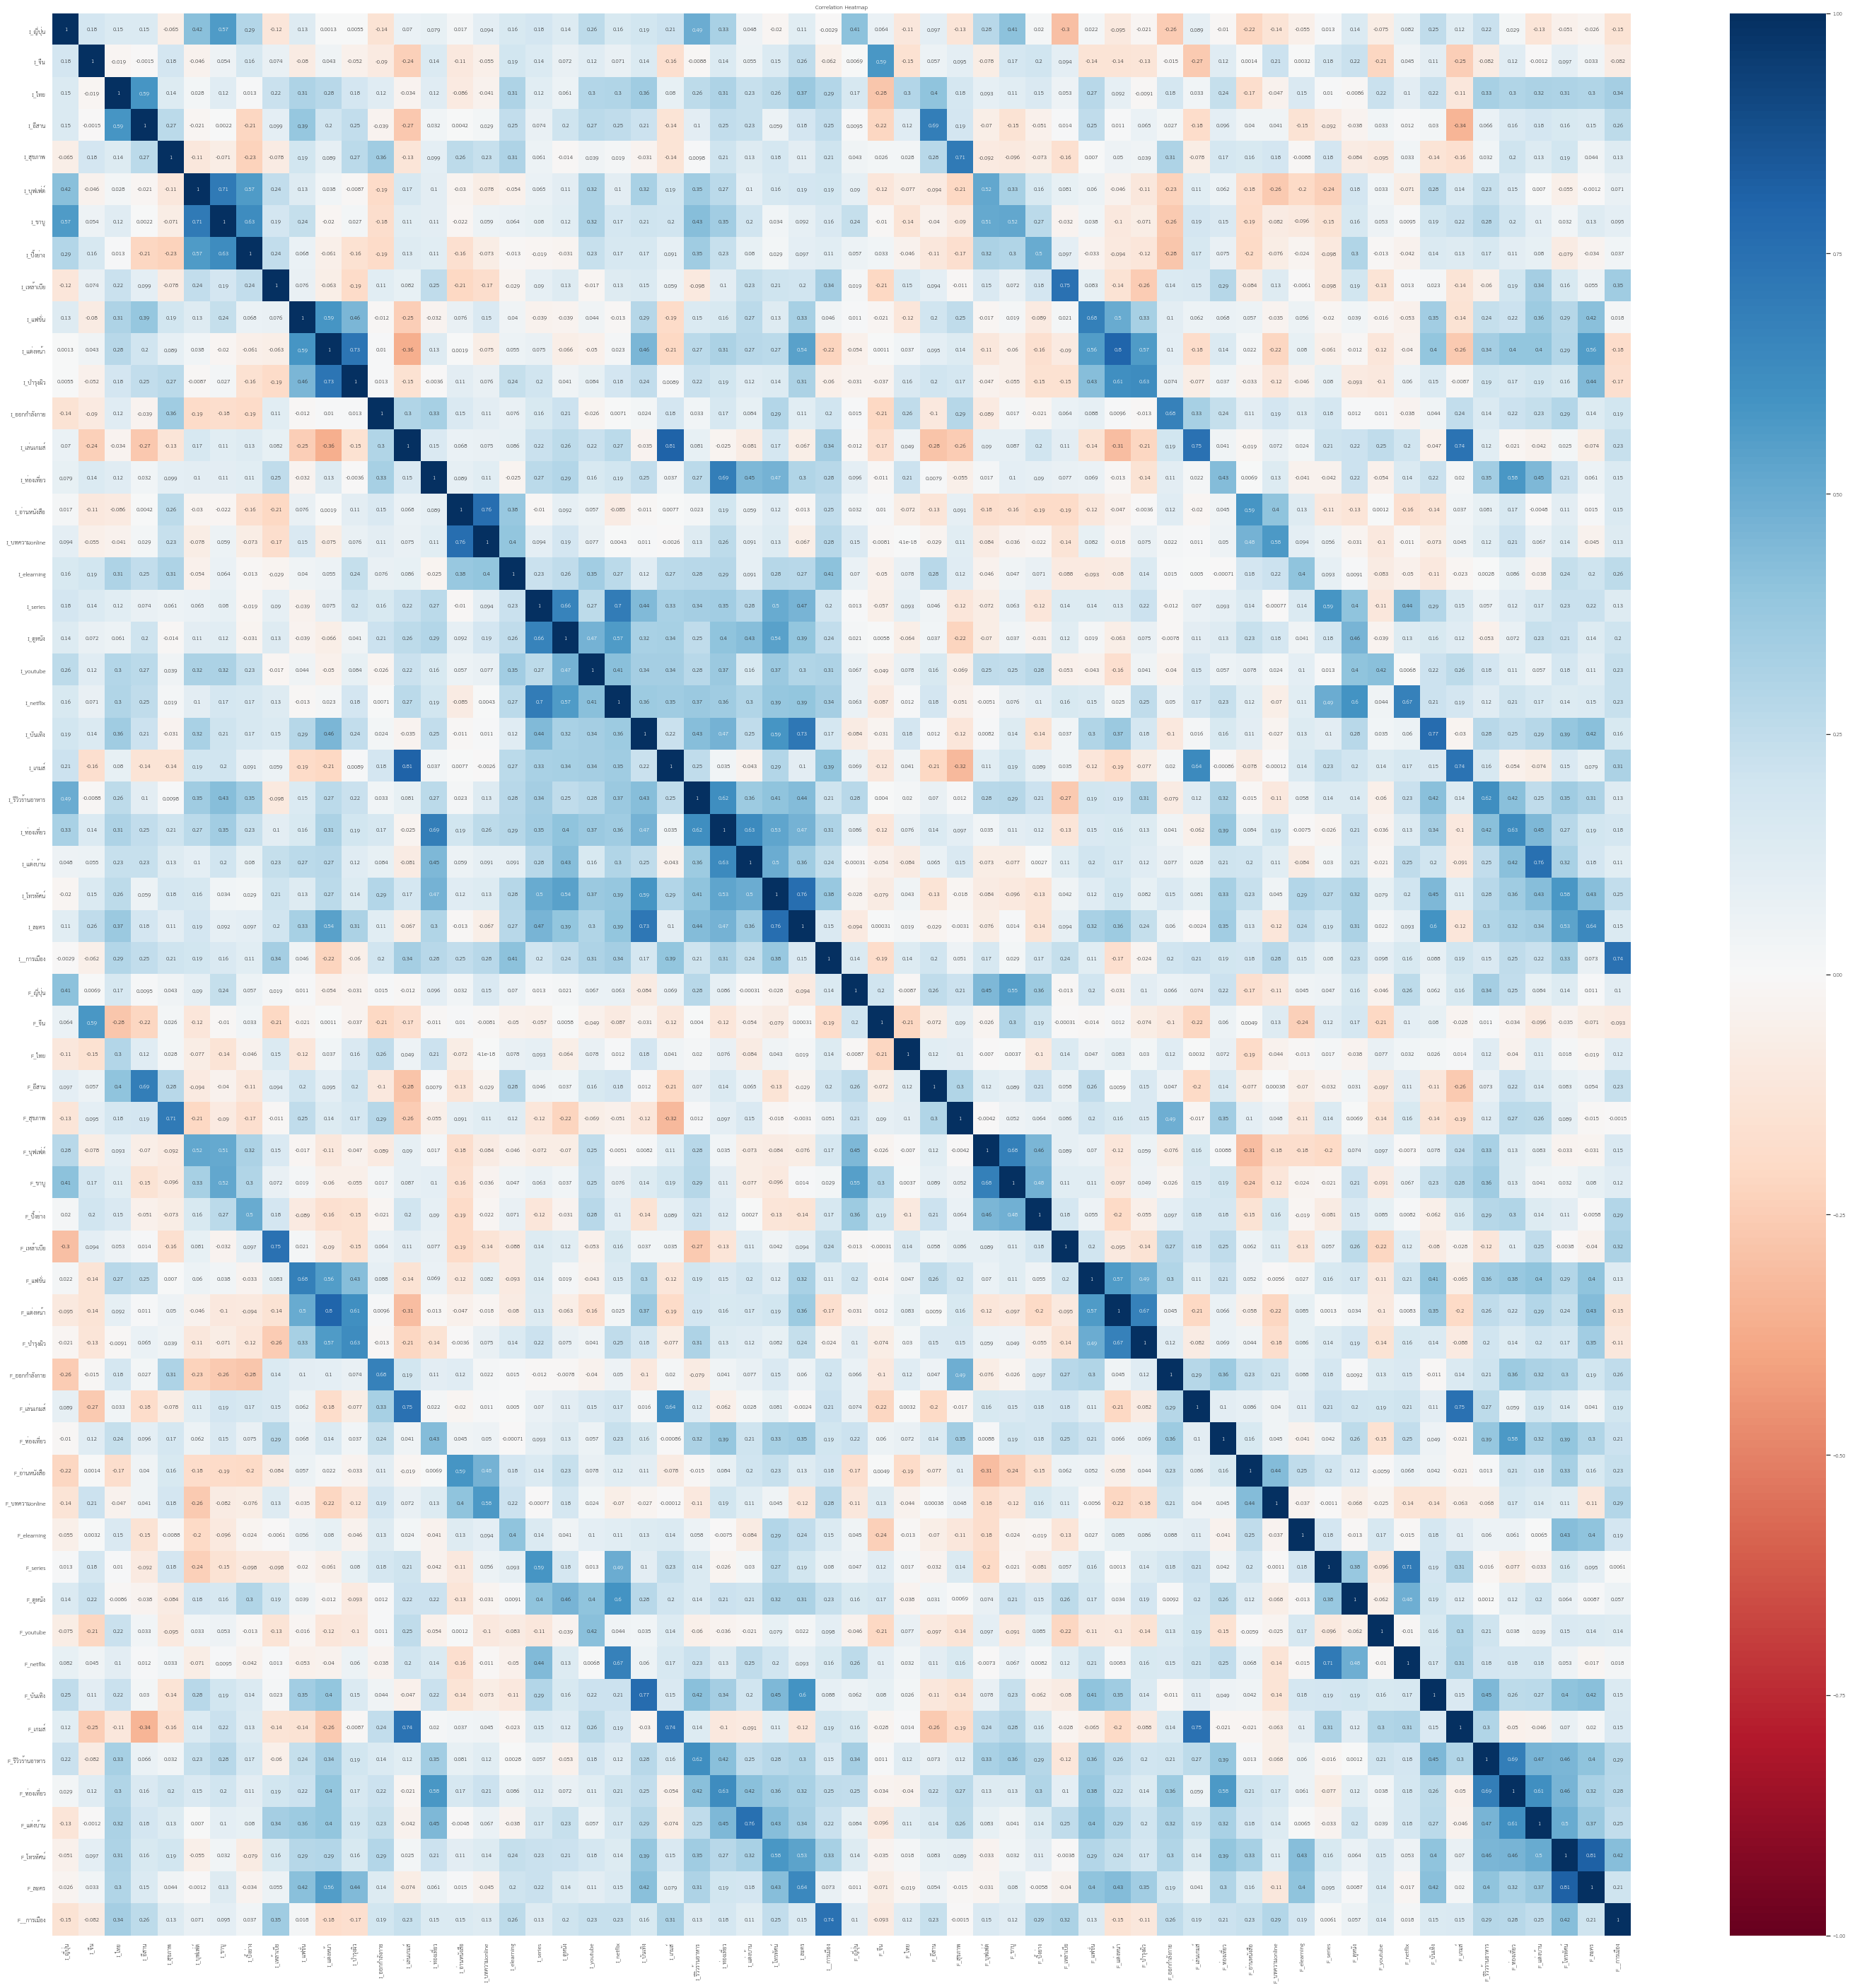

In [14]:
plt.figure(figsize = (50,50))
s = sns.heatmap(df.corr(),
                annot = True,
                cmap = 'RdBu',
                vmin = -1,
                vmax = 1)

s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=12)
plt.title('Correlation Heatmap')
plt.show()


In [16]:
df_male = df[df.เพศ == 'ชาย']
df_female = df[df.เพศ == 'หญิง']

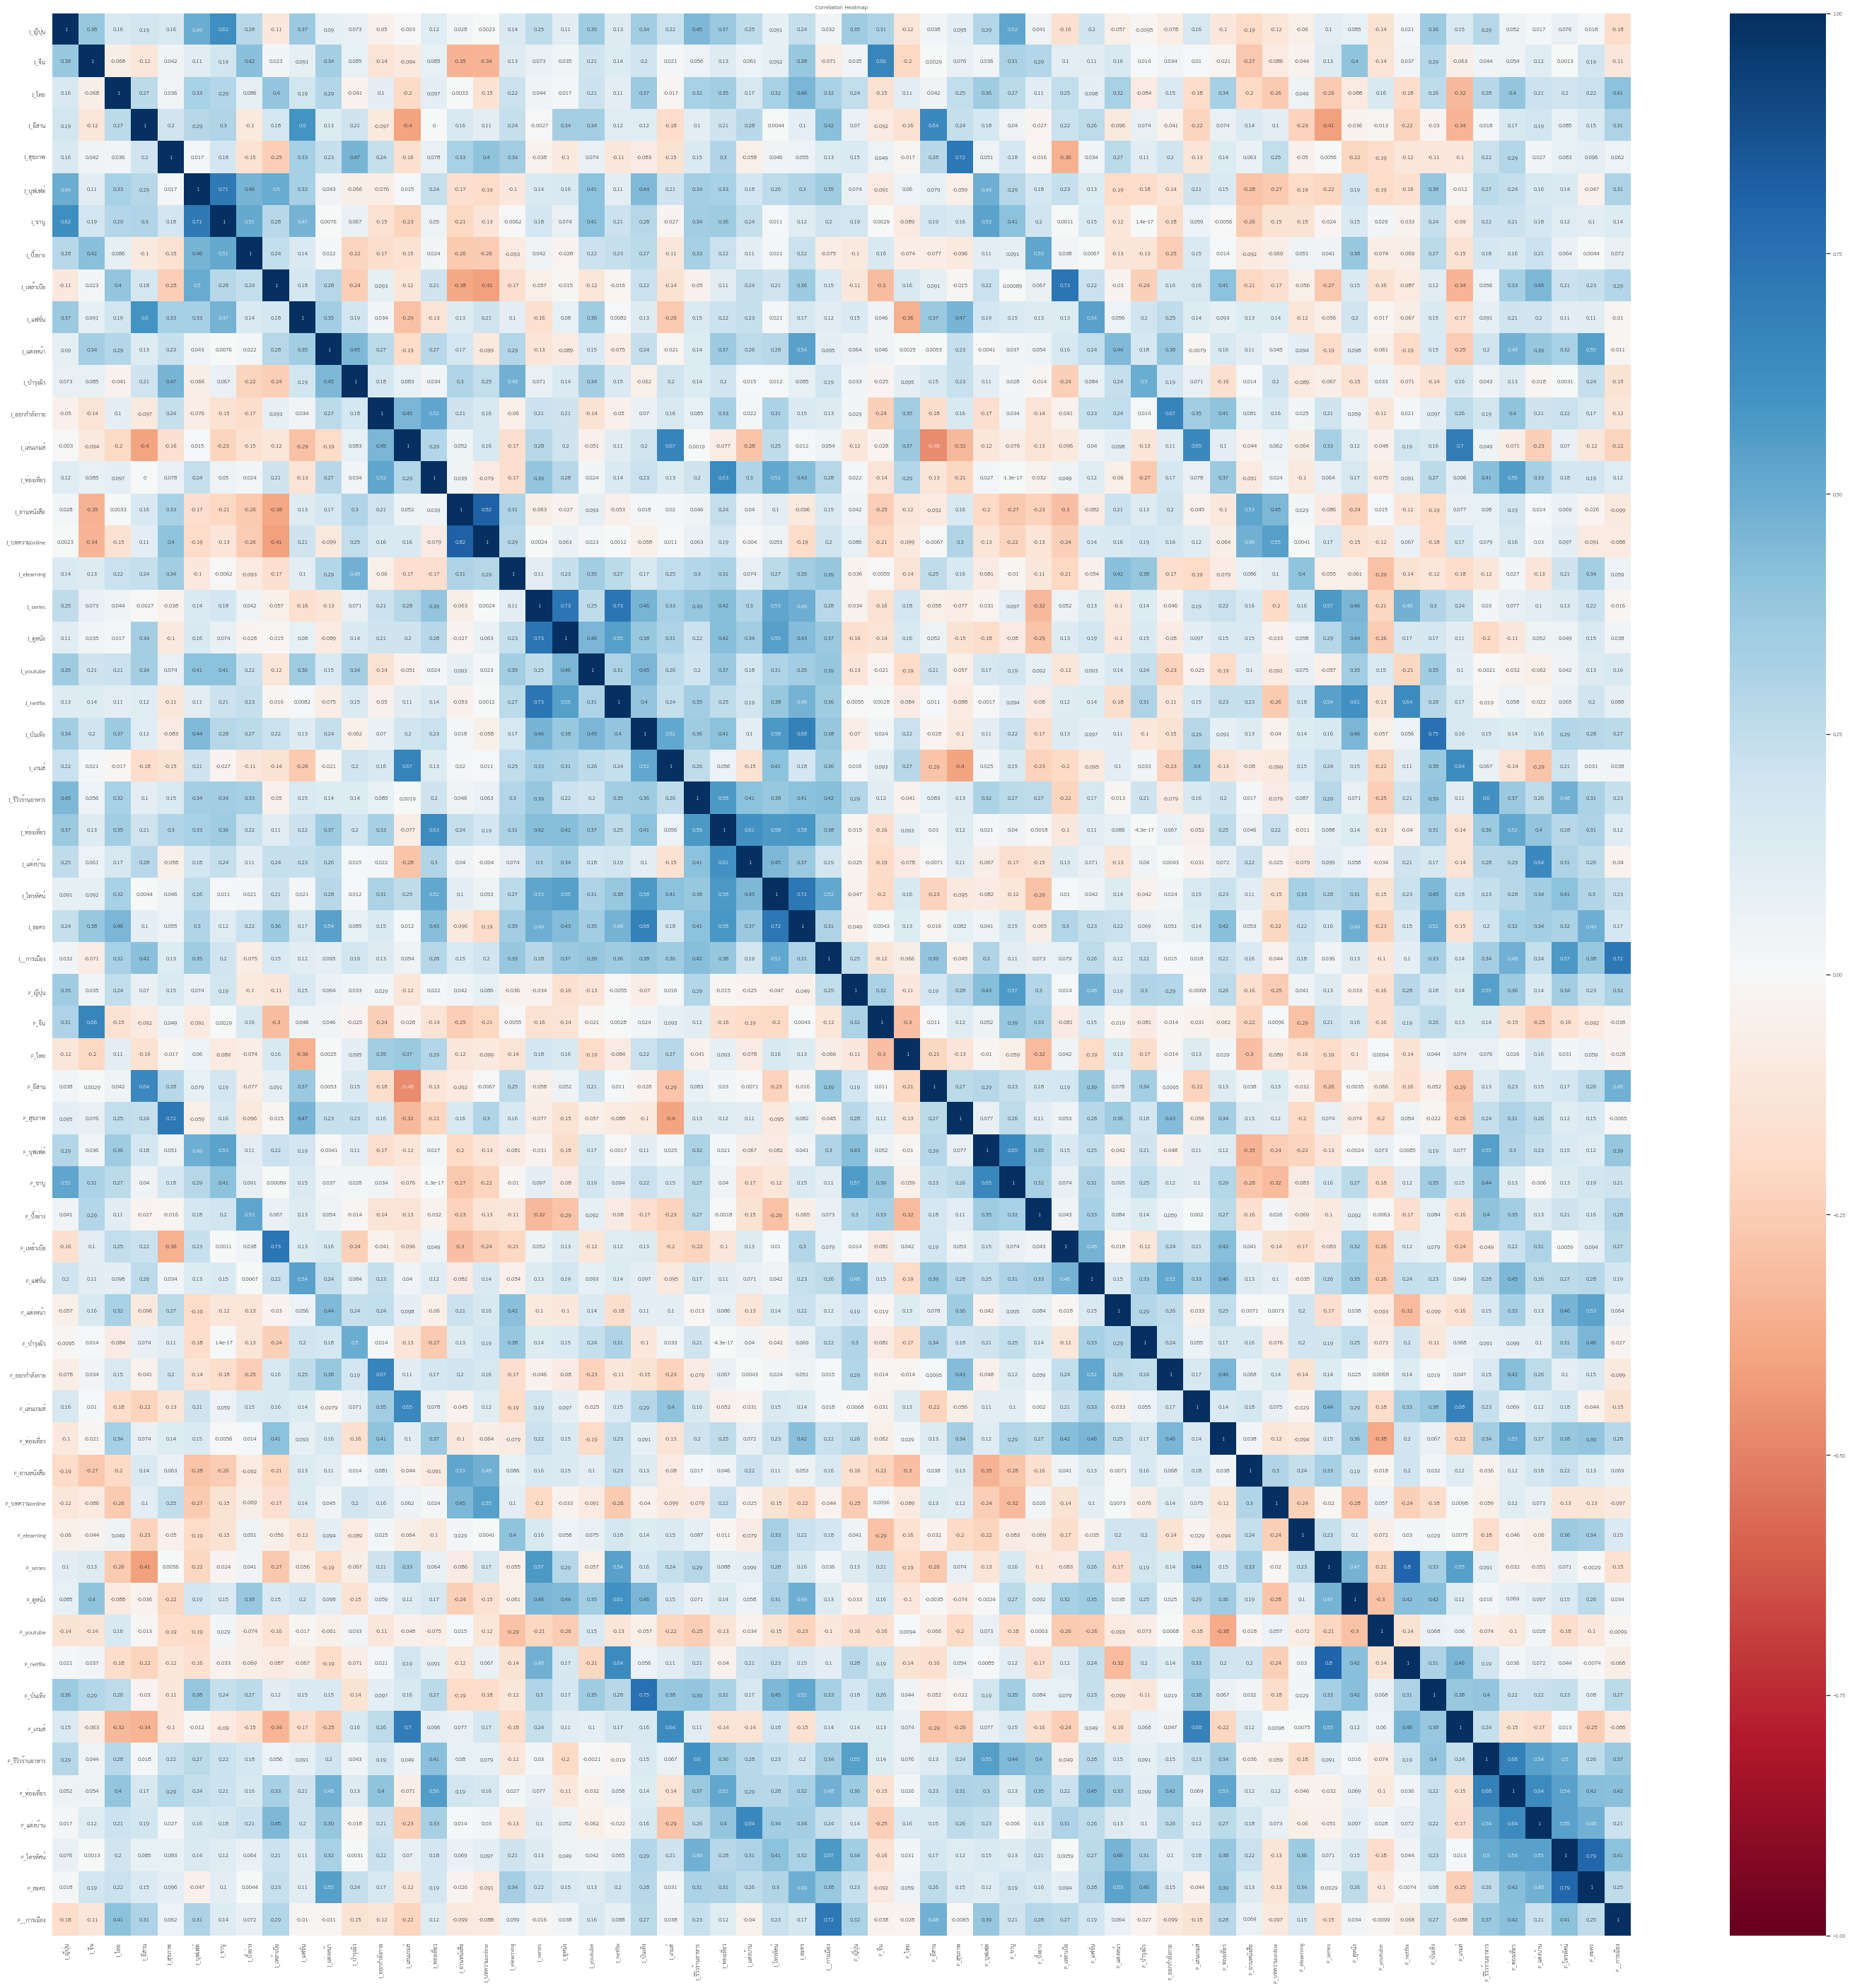

In [17]:
plt.figure(figsize = (50,50))
s = sns.heatmap(df_male.corr(),
                annot = True,
                cmap = 'RdBu',
                vmin = -1,
                vmax = 1)

s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=12)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
plt.figure(figsize=(12, 19))
plt.scatter()